Исходное изображение: (300, 480)
Размер исходного массива в памяти: 576000 байт
Всего сингулярных значений: 300


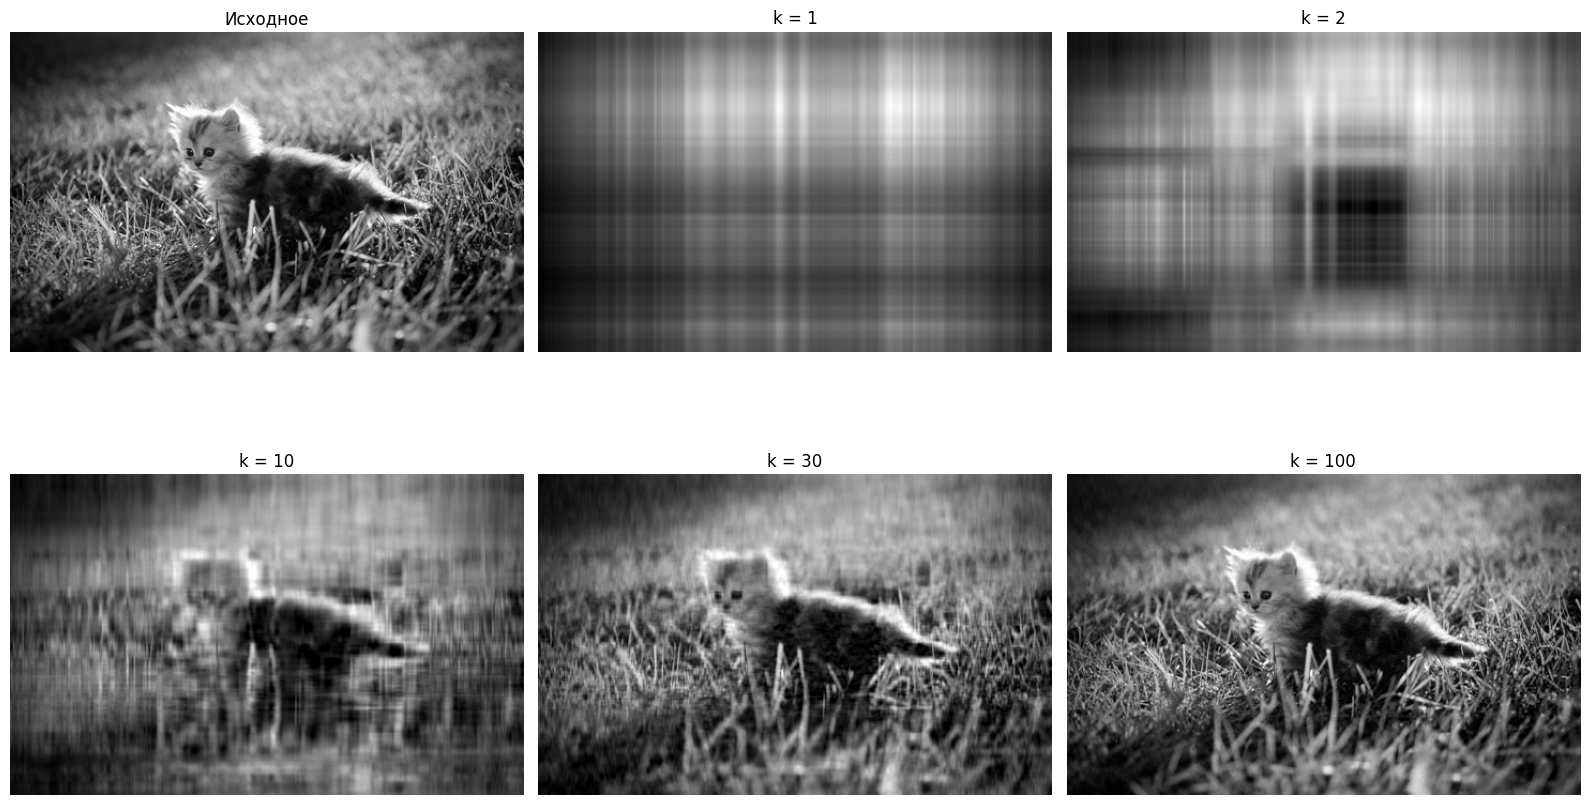


Сравнение объёма данных в памяти (SVD-представление)
Исходное изображение (float32):   576000 байт
k =   1 →     3124 байт (0.54%)
k =   2 →     6248 байт (1.08%)
k =  10 →    31240 байт (5.42%)
k =  30 →    93720 байт (16.27%)
k = 100 →   312400 байт (54.24%)


In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# -------------------------------------------------
# 1. Загрузка и предобработка изображения
# -------------------------------------------------
img = Image.open('kot.jpg')
w, h = img.size
img = img.resize((w // 4, h // 4))  # уменьшаем для ускорения

#Преобразуем в оттенки серого
img_gray = img.convert('L')
X = np.array(img_gray, dtype=np.float32)

print(f"Исходное изображение: {X.shape}")
original_bytes = X.nbytes
print(f"Размер исходного массива в памяти: {original_bytes} байт")

# -------------------------------------------------
# 2. SVD разложение
# -------------------------------------------------
U, S, Vt = np.linalg.svd(X, full_matrices=False)
print(f"Всего сингулярных значений: {len(S)}")

# -------------------------------------------------
# 3. Функция восстановления
# -------------------------------------------------
def reconstruct_svd(U, S, Vt, k):
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# -------------------------------------------------
# 4. Параметры эксперимента
# -------------------------------------------------
ranks = [1, 2, 10, 30, 100]

# -------------------------------------------------
# 5. Визуализация и сохранение PNG
# -------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Исходное изображение
axes[0].imshow(X, cmap='gray')
axes[0].set_title('Исходное', fontsize=12)
axes[0].axis('off')

# Восстановление и сохранение
for idx, k in enumerate(ranks, start=1):
    if k > len(S):
        k = len(S)
    
    #Восстановление
    X_recon = reconstruct_svd(U, S, Vt, k)
    
    #Приведение к uint8 для корректного отображения и сохранения
    X_disp = np.clip(X_recon, 0, 255).astype(np.uint8)
    
    #Отображение
    axes[idx].imshow(X_disp, cmap='gray')
    axes[idx].set_title(f'k = {k}', fontsize=12)
    axes[idx].axis('off')
    
    #Сохранение как PNG
    img_pil = Image.fromarray(X_disp)
    img_pil.save(f'kot_recon_k{k}.png')

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 6. Сравнение объёма данных в памяти
# -------------------------------------------------
print("\n" + "="*60)
print("Сравнение объёма данных в памяти (SVD-представление)")
print("="*60)
print(f"Исходное изображение (float32): {original_bytes:>8} байт")

for k in ranks:
    if k > len(S):
        k = len(S)
    
    #Размер компонент SVD в байтах
    bytes_U = U[:, :k].nbytes      # (H, k)
    bytes_S = S[:k].nbytes         # (k,)
    bytes_Vt = Vt[:k, :].nbytes    # (k, W)
    total_bytes = bytes_U + bytes_S + bytes_Vt
    
    compression_ratio = total_bytes / original_bytes
    
    print(f"k = {k:3d} → {total_bytes:>8} байт ({compression_ratio:.2%})")